In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [ ]:
import nltk
from nltk.corpus import stopwords

In [ ]:
ls yelp_data/

In [3]:
path = 'yelp_data/health_text_sentiment.csv'

In [4]:
df = pd.read_csv(path)
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64006 entries, 0 to 64005
Data columns (total 7 columns):
stars               64006 non-null int64
text                64006 non-null object
sent_value          64006 non-null float64
sent_score          64006 non-null object
clean_text          64006 non-null object
sent_value_clean    64006 non-null float64
sent_score_clean    64006 non-null object
dtypes: float64(2), int64(1), object(4)
memory usage: 3.4+ MB


In [6]:
df.head()

,stars,text,sent_value,sent_score,clean_text,sent_value_clean,sent_score_clean
0,1,Please stay away from this place if you can! I...,-0.050645,negative,please stay away place bad care imaginable sta...,-0.036719,negative
1,5,My husband has been a patient of Dr. Byrne for...,0.024962,positive,husband patient dr byrne last year half last m...,0.069479,positive
2,4,Dr. Byrne is a great doctor! She has great bed...,0.513333,positive,dr byrne great doctor great bed side manner ex...,0.317778,positive
3,3,I'm raising my review as Dr Bryne's has been m...,-0.035714,negative,raise review dr bryne receptive daughter go an...,0.002806,positive
4,1,I wish I could give 0 stars. Worst office I've...,-0.048246,negative,wish could give star bad office ever horrible ...,-0.084259,negative


## Remove unwanted columns
- use clean text from now on

In [ ]:
list(df.columns)

df = df[['stars',
 'clean_text',
 'sent_value_clean',
 'sent_score_clean']]

In [ ]:
df.head()

In [ ]:
df['len_text'] =  df.clean_text.apply(len)

In [ ]:
g = sns.FacetGrid(data=df, col='stars')
g.map(plt.hist, 'len_text', bins=50)

In [ ]:
sns.boxplot(x='stars', y='len_text', data=df)

# Independent and dependent variables

In [7]:
yelp_class = df[(df['stars'] == 1) | (df['stars'] == 5)]

In [8]:
yelp_class.head()

,stars,text,sent_value,sent_score,clean_text,sent_value_clean,sent_score_clean
0,1,Please stay away from this place if you can! I...,-0.050645,negative,please stay away place bad care imaginable sta...,-0.036719,negative
1,5,My husband has been a patient of Dr. Byrne for...,0.024962,positive,husband patient dr byrne last year half last m...,0.069479,positive
4,1,I wish I could give 0 stars. Worst office I've...,-0.048246,negative,wish could give star bad office ever horrible ...,-0.084259,negative
5,1,I went to the emergency room because i was hav...,0.137959,positive,go emergency room kidney stone attack emergenc...,0.133618,positive
6,5,Dr. Byrne is an excellent doctor with all the ...,0.250202,positive,dr byrne excellent doctor right skill include ...,0.210708,positive


## change to binary
- 1 stars will become 0
- 5 starts will become 1

In [9]:
yelp_class.stars.replace(1,0,inplace=True)
yelp_class.stars.replace(5,1,inplace=True)

In [10]:
yelp_class.head()

,stars,text,sent_value,sent_score,clean_text,sent_value_clean,sent_score_clean
0,0,Please stay away from this place if you can! I...,-0.050645,negative,please stay away place bad care imaginable sta...,-0.036719,negative
1,1,My husband has been a patient of Dr. Byrne for...,0.024962,positive,husband patient dr byrne last year half last m...,0.069479,positive
4,0,I wish I could give 0 stars. Worst office I've...,-0.048246,negative,wish could give star bad office ever horrible ...,-0.084259,negative
5,0,I went to the emergency room because i was hav...,0.137959,positive,go emergency room kidney stone attack emergenc...,0.133618,positive
6,1,Dr. Byrne is an excellent doctor with all the ...,0.250202,positive,dr byrne excellent doctor right skill include ...,0.210708,positive


In [11]:
X = yelp_class['clean_text']
y = yelp_class['stars']

In [ ]:
X[0:10]

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
%%time
bow_transformer = CountVectorizer().fit(X)

CPU times: user 3.53 s, sys: 312 ms, total: 3.84 s
Wall time: 3.82 s


Now, we can look at the size of the vocabulary stored in the vectoriser (based on X) like this:

In [14]:
len(bow_transformer.vocabulary_)

39244

In [15]:
review_21 = X[21]
print(review_21)

never treat poorly life never go back office unbelievably rude absolute bad bedside manner ever experience start finish even though system could not find chart decide charge new patient price even though clearly patient previously spend lot time phone finance lady like car dealer odd tell exactly come financially know expect last time reciev bill yup right seem little excessive pap routine lab sure like take advantage cash pay people sad especially since sure fair share rip insurance company anyway tell come early appointment wind wait hour waiting room no one would acknowledge finally ask could see soooo rudely bring back room see super rude grumpy nurse practitioner treat like airhead instead address issue go right want bloodwork cholesterol screening mammogram tell probably pituitary tumor wtf not even routine exam point tell not know talk rude rude rude woman interested lab make money anything horrible experience hag deal car dealer finance lady decide charge new patient price exis

In [16]:
import numpy as np
np.set_printoptions(threshold=np.inf)

Now let’s see our review represented as a vector:


In [17]:
bow_21 = bow_transformer.transform([review_21])

In [18]:
type(bow_21)

scipy.sparse.csr.csr_matrix

In [19]:
bow_21.shape

(1, 39244)

In [20]:
print(bow_21)

  (0, 137)	1
  (0, 321)	1
  (0, 445)	1
  (0, 529)	1
  (0, 582)	1
  (0, 778)	1
  (0, 862)	1
  (0, 882)	1
  (0, 1610)	1
  (0, 1732)	1
  (0, 1738)	1
  (0, 1871)	1
  (0, 2107)	1
  (0, 2259)	1
  (0, 2810)	2
  (0, 2855)	1
  (0, 3319)	1
  (0, 3690)	1
  (0, 3940)	1
  (0, 4477)	1
  (0, 4706)	1
  (0, 4726)	1
  (0, 5109)	2
  (0, 5142)	1
  (0, 5291)	1
  :	:
  (0, 33695)	1
  (0, 33788)	2
  (0, 34098)	1
  (0, 34170)	1
  (0, 34198)	1
  (0, 34454)	5
  (0, 34470)	1
  (0, 34554)	1
  (0, 34812)	1
  (0, 34866)	2
  (0, 35046)	2
  (0, 35567)	2
  (0, 35740)	1
  (0, 35802)	1
  (0, 36121)	1
  (0, 36826)	1
  (0, 37749)	1
  (0, 37754)	1
  (0, 37777)	1
  (0, 37821)	1
  (0, 38412)	1
  (0, 38537)	1
  (0, 38663)	1
  (0, 38749)	1
  (0, 39057)	1


In [21]:
print(bow_21.max())

6


In [22]:
len(bow_21.data)

145

In [23]:
print(bow_21> 3)

  (0, 20122)	True
  (0, 24005)	True
  (0, 25703)	True
  (0, 25957)	True
  (0, 30081)	True
  (0, 34454)	True


In [24]:
print(bow_21== 6)

  (0, 30081)	True


This means that there are 24 unique words in the review (after removing stopwords). Two of them appear thrice, and the rest appear only once. Let’s go ahead and check which ones appear thrice:

In [25]:
print(bow_transformer.get_feature_names()[20122])
print(bow_transformer.get_feature_names()[24005])
print(bow_transformer.get_feature_names()[25957])
print(bow_transformer.get_feature_names()[25703])
print(bow_transformer.get_feature_names()[30081])
print(bow_transformer.get_feature_names()[34454])

like
not
people
patient
rude
tell


Now that we’ve seen how the vectorisation process works, we can transform our X dataframe into a sparse matrix. To do this, let’s use the .transform() method on our bag-of-words transformed object.

In [26]:
%%time
X = bow_transformer.transform(X)

CPU times: user 3.56 s, sys: 31.2 ms, total: 3.59 s
Wall time: 3.59 s


We can check out the shape of our new X.

In [27]:
print('Shape of Sparse Matrix: ', X.shape)
print('Amount of Non-Zero occurrences: ', X.nnz)

Shape of Sparse Matrix:  (53714, 39244)
Amount of Non-Zero occurrences:  2575139


In [28]:
# Percentage of non-zero values
density = (100.0 * X.nnz / (X.shape[0] * X.shape[1]))
print('Density: {}'.format((density)))

Density: 0.12216306330162087


# Training data and test data


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
%%time
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.25)

CPU times: user 93.8 ms, sys: 0 ns, total: 93.8 ms
Wall time: 90 ms


In [31]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [32]:
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

# Testing and evaluating

In [33]:
preds = nb.predict(X_test)

Next, let’s evaluate our predictions against the actual ratings (stored in y_test) using confusion_matrix and classification_report from Scikit-learn.

In [34]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,recall_score,precision_score

In [35]:
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))

[[5177  210]
 [ 386 7656]]


             precision    recall  f1-score   support

          0       0.93      0.96      0.95      5387
          1       0.97      0.95      0.96      8042

avg / total       0.96      0.96      0.96     13429



In [36]:
cm = confusion_matrix(y_test, preds)

In [37]:
cm

array([[5177,  210],
       [ 386, 7656]])

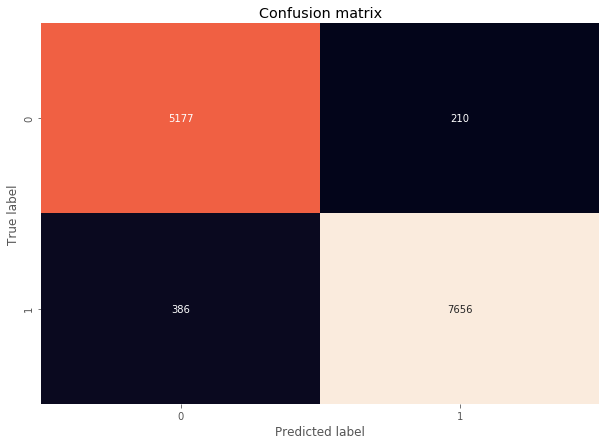

In [38]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [39]:
np.unique(preds,return_counts=True)

(array([0, 1]), array([5563, 7866]))

In [40]:
y_test.value_counts()

1    8042
0    5387
Name: stars, dtype: int64

# Confusion Matrix deep dive

### Basic terminology
- **True Positives (TP)**: we correctly predicted a positive review
- **True Negatives (TN)**: we correctly predicted that a negative review
- **False Positives (FP)**: we incorrectly predicted a positive review (a "Type I error")
- **False Negatives (FN)**: we incorrectly predicted a negative review (a "Type II error")

In [41]:
confusion = confusion_matrix(y_test, preds)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [42]:
confusion

array([[5177,  210],
       [ 386, 7656]])

# Metrics computed from a confusion matrix 

**Classification Accuracy**: Overall, how often is the classifier correct?


In [43]:
print((TP + TN) / float(TP + TN + FP + FN))
print(accuracy_score(y_test, preds))

0.9556184377094348
0.9556184377094348


## Classification Error: Overall, how often is the classifier incorrect?
- Also known as "Misclassification Rate"


In [44]:
print((FP + FN) / float(TP + TN + FP + FN))
print(1 - accuracy_score(y_test, preds))

0.044381562290565196
0.044381562290565224


# Sensitivity: When the actual value is positive, how often is the prediction correct?
- How "sensitive" is the classifier to detecting positive instances?
- Also known as "True Positive Rate" or "Recall"


In [45]:
print(TP / float(TP + FN))
print(recall_score(y_test, preds))

0.9520019895548371
0.9520019895548371


# Specificity: When the actual value is negative, how often is the prediction correct?
- How "specific" (or "selective") is the classifier in predicting positive instances?

In [46]:
print(TN / float(TN + FP))

0.9610172637831818


**False Positive Rate**: When the actual value is negative, how often is the prediction incorrect?

In [47]:
print(FP / float(TN + FP))

0.03898273621681827


**Precision**: When a positive value is predicted, how often is the prediction correct?
- How "precise" is the classifier when predicting positive instances?

In [48]:
print(TP / float(TP + FP))
print(precision_score(y_test, preds))

0.973302822273074
0.973302822273074




Many other metrics can be computed: F1 score, Matthews correlation coefficient, etc.






### Conclusion:
- Confusion matrix gives you a more complete picture of how your classifier is performing
- Also allows you to compute various classification metrics, and these metrics can guide your model selection

### Which metrics should you focus on?
- Choice of metric depends on your business objective 
- spam filter (positive class is "spam"): Optimize for precision or specificity because false negatives (spam goes to the inbox) are more acceptable than false positives (non-spam is caught by the spam filter)
- Fraudulent transaction detector (positive class is "fraud"): Optimize for sensitivity because false positives (normal transactions that are flagged as possible fraud) are more acceptable than false negatives (fraudulent transactions that are not detected)


# Data Bias
Although our model achieved quite a high accuracy, there are some issues with bias caused by the dataset.
Let’s take some singular reviews, and see what rating our model predicts for each one.

## Predicting a singular positive review


In [49]:
yelp_class.loc[59]

stars                                                               1
text                Dr. Seiff is very profesionalHe did surgery in...
sent_value                                                   0.276111
sent_score                                                   positive
clean_text          dr seiff profesionalhe surgery low back save l...
sent_value_clean                                             0.193333
sent_score_clean                                             positive
Name: 59, dtype: object

In [50]:
positive_review = yelp_class['clean_text'][59]
positive_review

'dr seiff profesionalhe surgery low back save leg two month surgery come back follow clinic clean stuff kind dr paition answer question'

Seems like someone had the time of their life at this place, right? We can expect our model to predict a rating of 5 for this review.

In [51]:
positive_review_transformed = bow_transformer.transform([positive_review])
nb.predict(positive_review_transformed)[0]

1

Our model thinks this review is positive, just as we expected.
## Predicting a singular negative review

In [52]:
yelp_class.loc[221]

stars                                                               0
text                I went to Dr. Monk a few years ago over a pre ...
sent_value                                                  -0.173333
sent_score                                                   negative
clean_text          go dr monk year ago pre cancerous auto immune ...
sent_value_clean                                            -0.175833
sent_score_clean                                             negative
Name: 221, dtype: object

In [53]:
negative_review = yelp_class['clean_text'][221]
negative_review

'go dr monk year ago pre cancerous auto immune disorder pcp want check ridicule diagnosis come pcp research wait ridiculous long staff cold one gal keep call ask help take dog table accuse unspeakable thing not true humiliate embarrassment treat like piece meat tell pcp physician treatment also call ask result test order concern fistula disturbing no one ever contact result insist get poor service not complainer work practice management horrible experience top gyn oncologist bs wish vince thompson still alive good ever'

This is a slightly more negative review. So, we can expect our model to rate this a 1-star.

In [54]:
negative_review_transformed = bow_transformer.transform([negative_review])
nb.predict(negative_review_transformed)[0]

0